In [2]:
import pandas as pd
import numpy as np
import os

import ebooklib
from ebooklib import epub
from tqdm.notebook import tqdm

import json
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(os.getcwd() + '/data/pg_clean.csv')[0:20]
df.head(5)

,id,genre,filename,author,title,lang,corpus,fear,anger,trust,surprise,positive,negative,sadness,disgust,joy
0,50921,science_fiction,50921.epub,Jack McKenty,"$1,000 a Plate",en,"When Marsy Gras shot off its skyrockets, Mars\...","[0.2222222222222222, 0.0, 0.0, 0.0, 0.0, 0.1, ...","[0.1111111111111111, 0.0, 0.0, 0.0, 0.0, 0.1, ...","[0.0, 0.16666666666666666, 0.0, 0.0, 0.0, 0.1,...","[0.1111111111111111, 0.16666666666666666, 0.0,...","[0.2222222222222222, 0.16666666666666666, 0.0,...","[0.2222222222222222, 0.0, 0.0, 0.0, 0.5, 0.1, ...","[0.1111111111111111, 0.16666666666666666, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.16666666666666666, 0.0, 0.0, 0.0, 0.1,..."
1,21279,science_fiction,21279.epub,Kurt Vonnegut,2 B R 0 2 B,en,Everything was perfectly swell.There were no p...,"[0.25, 0.125, 0.0, 0.0, 0.0, 0.0, 0.1111111111...","[0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.125, 0.0, 0.0, 0.0, 0.0, 0.11111111111...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1111111111111...","[0.0, 0.375, 0.0, 1.0, 0.0, 0.0, 0.11111111111...","[0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.222222222222...","[0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11111111111...","[0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.125, 0.0, 0.0, 0.0, 0.0, 0.11111111111..."
2,22227,science_fiction,22227.epub,Graph Waldeyer,The 4-D Doodler,en,"This etext was produced from Comet, July 1941....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25,...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.5, 1.0, 0.3333333333333333, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25,..."
3,24517,science_fiction,24517.epub,Peter Baily,Accidental Death,en,The most dangerous of weapons\nis the one you ...,"[0.3333333333333333, 1.0, 0.0, 0.125, 0.2, 0.0...","[0.0, 0.0, 0.0, 0.125, 0.1, 0.0, 0.0, 0.0, 0.0...","[0.0, 0.0, 0.16666666666666666, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.05555555555555555, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.2222222222222222, 0.0, 0.0, 0.0, ...","[0.6666666666666666, 0.0, 0.1111111111111111, ...","[0.0, 0.0, 0.16666666666666666, 0.375, 0.2, 0....","[0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.1111111111111111, 0.0, 0.0, 0.0, ..."
4,29159,science_fiction,29159.epub,Bill Garson,Acid Bath,en,The starways' Lone Watcher had expected some o...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.285...","[0.0, 0.25, 0.0, 0.14285714285714285, 0.0, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.25, 0.14...","[0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, ...","[0.5, 0.0, 0.5, 0.2857142857142857, 0.0, 0.0, ...","[0.0, 0.5, 0.5, 0.14285714285714285, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.2857142857142857, 0.33333333...","[0.0, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.0,..."


In [4]:
y = json.loads(df['positive'][0])
x = np.linspace(0, len(y), num=len(y), endpoint=True)



print(len(x), len(y))

lin = interp1d(x, y)
cub = interp1d(x, y, kind='cubic')


171 171


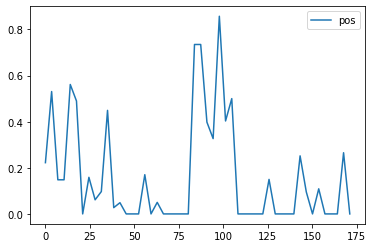

In [16]:
xnew = np.linspace(0, len(y), num=50, endpoint=True)
plt.plot(xnew, lin(xnew), '-', label='pos')
#plt.plot(xnew, cub(xnew), '--', label='cub')
plt.legend(loc='best')



In [48]:
def nrc_values(idx):

    nrc_columns = ['anger', 'trust', 'surprise', 'positive', 'negative',
                   'sadness', 'disgust', 'joy']

    plt.figure(figsize=(12,8))

    for val in nrc_columns:
        y = json.loads(df[val][idx])
        x = np.linspace(0, len(y), num=len(y), endpoint=True)

        lin = interp1d(x, y)
        xnew = np.linspace(0, len(y), num=50, endpoint=True)

        plt.plot(xnew, lin(xnew), '-', alpha=0.5,label=val)


    plt.title(df['title'][idx] + ' by ' + df['author'][idx])
    plt.xlabel('Sentence')
    plt.ylabel('Emotion frequency')
    plt.legend(loc='best')

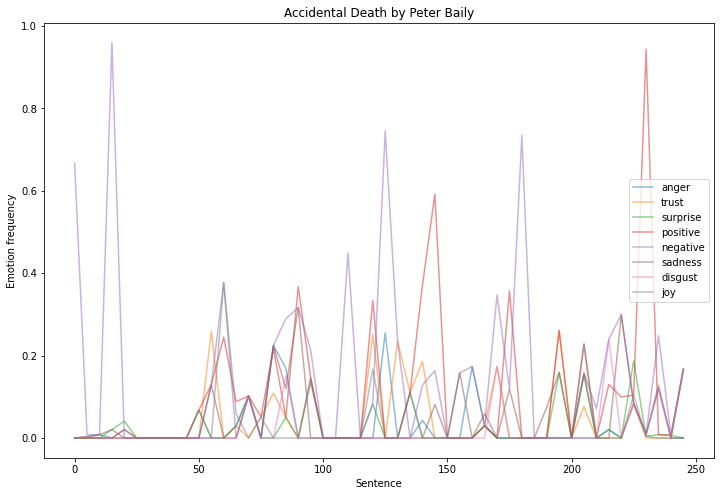

In [49]:
nrc_values(3)

In [43]:
vals

[0.2222222222222222,
 0.16666666666666666,
 0.0,
 1.0,
 0.0,
 0.2,
 0.5,
 0.125,
 0.0625,
 0.0,
 0.25,
 0.0,
 0.0,
 1.0,
 0.5,
 0.0,
 0.3333333333333333,
 0.75,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2222222222222222,
 0.0,
 0.3333333333333333,
 0.25,
 0.0,
 0.0,
 0.0,
 0.125,
 0.0,
 0.25,
 0.3333333333333333,
 0.5,
 0.3333333333333333,
 0.0,
 0.0,
 0.16666666666666666,
 0.3076923076923077,
 0.0,
 0.07692307692307693,
 0.23809523809523808,
 0.14285714285714285,
 0.0,
 0.0,
 0.3333333333333333,
 0.0,
 0.0,
 0.2,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3333333333333333,
 0.0,
 0.0,
 0.0,
 0.2,
 0.14285714285714285,
 0.09090909090909091,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.3333333333333333,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.2222222222222222,
 0.0,
 1.0,
 0.0,
 0.4,
 0.5,
 0.0,
 0.25,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.25,
 0.5,
 0.0,
 0.0,
 0.5,
 0.5,
 0.16666666666666666,
 0.0,
 0.0,
 0.2727272727272727,
 0.5,
 0.0,
 0.0,
